# Pandas and Finance Exercise
Let's test your new skills!

## Complete the Tasks in Bold Below.



**NOTE: For this exercise, you will need to answer the questions below given the dataset of the SP500 (https://finance.yahoo.com/quote/SPY/). Part of the tasks is to download this dataset, if for some reason you can not download this dataset, we have provided a .csv file in this same folder you can read called SPY2000_2021.csv**

**Task: Import any necessary libraries you think you will need (or just import them as you go along)**

In [2]:
# CODE HERE
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

**Task: SPY is one of the original index ETFs tracking the S&P 500 group of stocks. Use Python to grab the SPY historical data from Janurary 1st in 2000 to Janurary 1st in 2021.** 

*Note: Use any library or method you prefer.*

In [3]:
# Getting SPY ticker from y!Finance
df = yf.download("SPY", start="2000-01-01", end="2021-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2000-01-03,92.414955,94.202094,91.422100,94.202094,8164300
2000-01-04,88.800903,91.541182,88.731404,91.203611,8089800
2000-01-05,88.959763,89.932760,87.212339,88.920048,12177900
2000-01-06,87.530075,89.912926,87.530075,88.721501,6227200
2000-01-07,92.613510,92.613510,88.999518,89.158375,8066500
...,...,...,...,...,...
2020-12-24,347.452576,347.480823,345.993098,346.586286,26457900
2020-12-28,350.437439,350.832897,349.401667,350.032527,39000400


**Task: Check the head of the ten first entries in the dataset**

In [5]:
# Head view
df.head(10)

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2000-01-03,92.414955,94.202094,91.422100,94.202094,8164300
2000-01-04,88.800903,91.541182,88.731404,91.203611,8089800
2000-01-05,88.959763,89.932760,87.212339,88.920048,12177900
2000-01-06,87.530075,89.912926,87.530075,88.721501,6227200
2000-01-07,92.613510,92.613510,88.999518,89.158375,8066500
2000-01-10,92.931190,93.348189,92.156764,92.931190,5741700
2000-01-11,91.819244,92.831957,91.183817,92.653243,7503700
2000-01-12,90.905754,91.878751,90.786612,91.878751,6907700


**Task: Check the datatype of all entries**

In [13]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [14]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2000-01-03 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5284 non-null   float64
 1   High    5284 non-null   float64
 2   Low     5284 non-null   float64
 3   Open    5284 non-null   float64
 4   Volume  5284 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 247.7 KB


**Task: Plot the Adjusted Closing price of the SP500, with the price on the y axis and the year on the x axis. Use Locator() and Formatter() techniques to configure the plot x axis so that you can see a tick for every year in the dataset (only showing the year number, not the full YYYY-MM-DD that is the default). Choose a reasonable figure size, set the dpi to 300 and save this plot in your working directory as sp500.png**

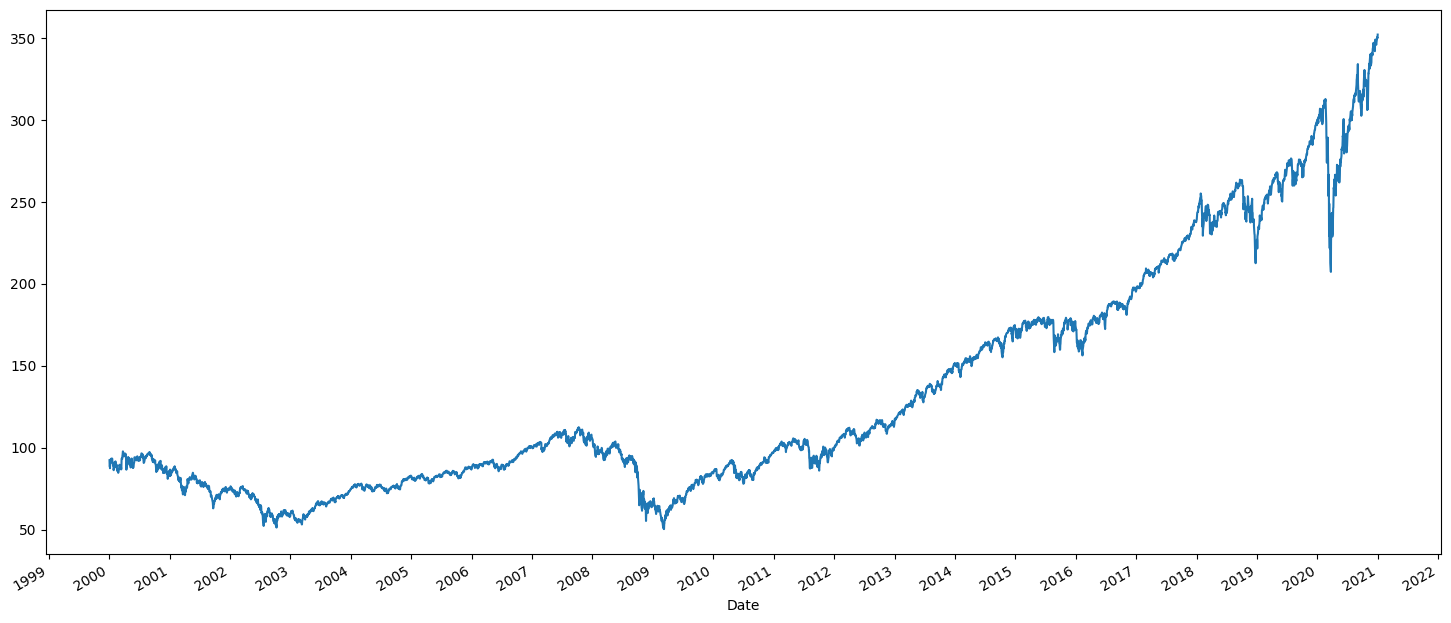

In [42]:
from matplotlib import dates
ax = df.Close.plot(figsize=(18,8))

ax.xaxis.set_major_locator(dates.YearLocator())

**Task: Create a histogram of the daily volume of shares of SPY traded. Choose a reasonable bin size.**

<Axes: >

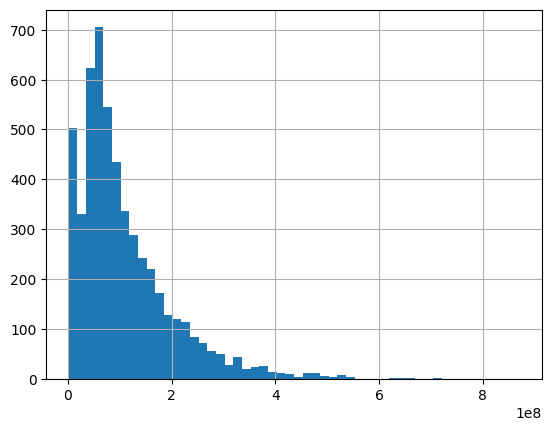

In [45]:
df.Volume.hist(bins=52)

**Task: Let's explore the crash and recovery of 2020 due to the COVID pandemic. Create a line plot of the Adj. Close price from 1-1-2020 to 1-1-2021. The xaxis ticks should be formatted by YYYY-MM**

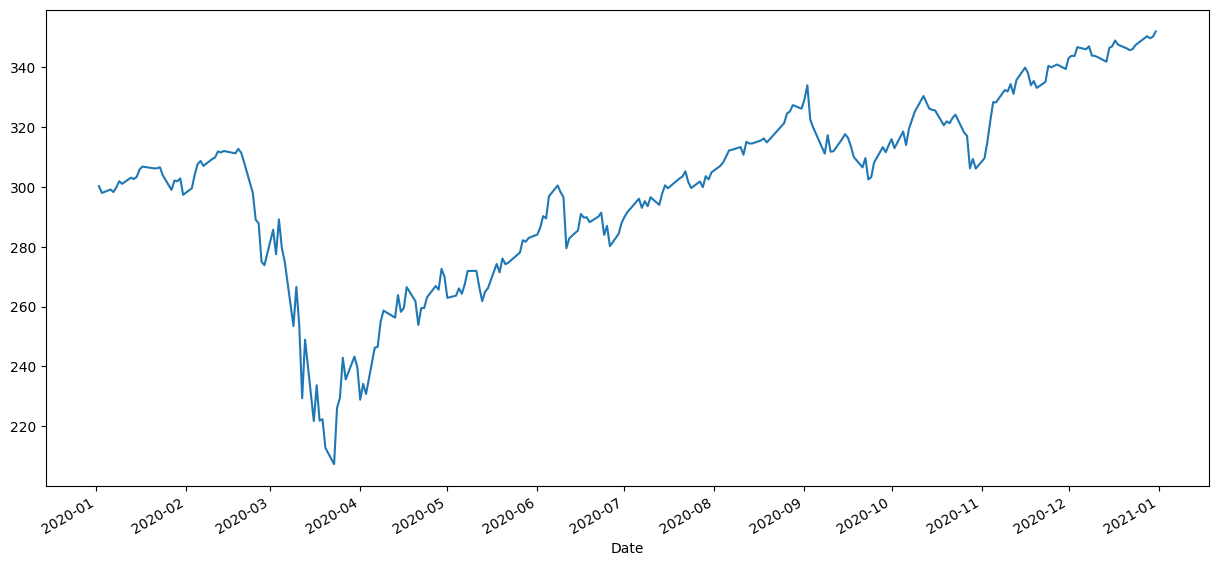

In [56]:
# Plot crash 2020
ax = df.Close["2020-01-01":"2021-01-01"].plot(figsize=(15,7))
ax.xaxis.set_major_locator(dates.MonthLocator())

**Task: Create a plot whichs shows the adjusted closing price of SPY for the entire length of the time series along with an added trend line of the corresponding 200 days rolling mean of the adj. close price. Make sure to add a legend that identifies each line.** 

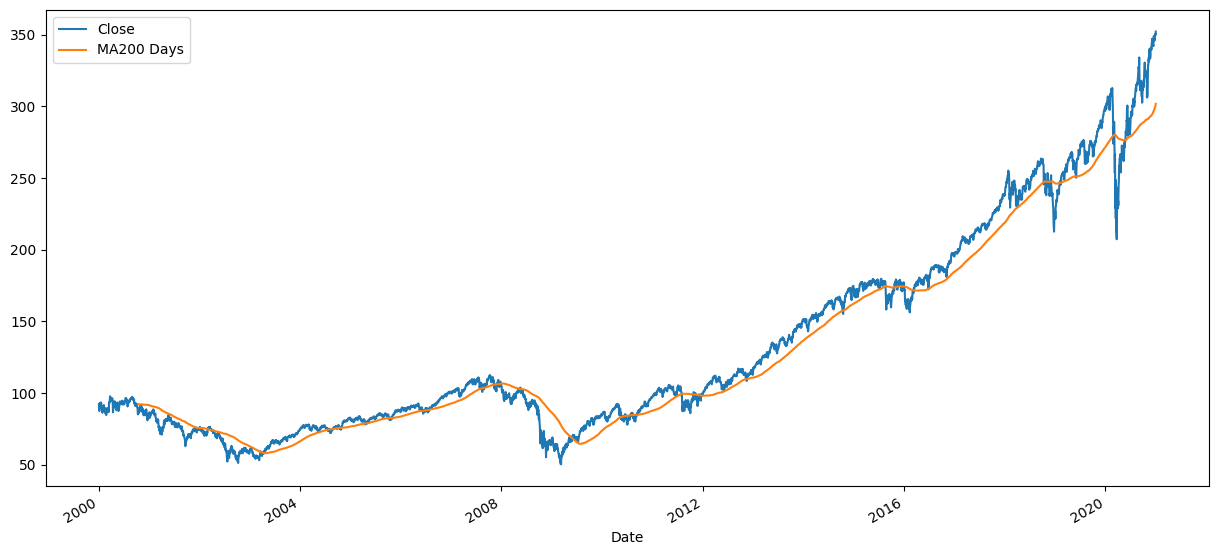

In [68]:
# MA200 with the trend
df['Close'].plot(label = 'Close', figsize=(15,7))
df.Close.rolling(window=200).mean().plot(label="MA200 Days")
plt.legend();


**Task: If you bought one share at the start of the time series on Jan 1st 2000, how much money would you have gained (in Adj. Close Dollar amount) by Jan 1st 2021?**

Take the adjusted closing price as reference

In [74]:
df['Close'].iloc[-1] - df['Close'].iloc[0]

np.float64(259.63256072998047)

In [77]:
df.Close.diff().cumsum().iloc[-1]

np.float64(259.63256072998047)

**Task: What was the percent increase in value (based on Adj. Close price) from Jan 1st, 2000 to Jan 1st 2021?**

In [79]:
100*(df.Close.iloc[-1] - df.Close.iloc[0]) / df.Close.iloc[0]

np.float64(280.9421487453204)

**Task: Return the 10 dates with the largest gain for the SPY.**

In [ ]:
# Largest 10 pct change
(df #data
 .Close #column
 .pct_change(1) #percentual change
 .sort_values(ascending=False) #sort DESC
 .head(10) #top 10
 )

Date
2008-10-13    0.145198
2008-10-28    0.116855
2020-03-24    0.090603
2020-03-13    0.085486
2009-03-23    0.071829
2008-11-24    0.069291
2020-04-06    0.067166
2008-11-13    0.062339
2008-10-20    0.060079
2002-07-24    0.059663
Name: Close, dtype: float64

**TASK: What were the 10 dates with the highest daily percent change from the previous day (either gain OR decrease).**

In [ ]:
(df #data
 .Close #column
 .pct_change(1) #percentual change
 .abs() #absolute values
 .sort_values(ascending=False) #sort DESC
 .head(10) #top 10
#  .index #if want the dates only
 )

Date
2008-10-13    0.145198
2008-10-28    0.116855
2020-03-16    0.109423
2008-10-15    0.098448
2020-03-12    0.095677
2020-03-24    0.090603
2008-12-01    0.088578
2020-03-13    0.085486
2008-09-29    0.078362
2020-03-09    0.078094
Name: Close, dtype: float64

**Task: For each year in the dataset, find the Maximum Adj. Close price that SPY reached for that year.**

In [88]:
df.Close.resample(rule='YE').max()

Date
2000-12-31     97.825752
2001-12-31     88.566170
2002-12-31     76.599052
2003-12-31     74.713860
2004-12-31     83.041977
2005-12-31     88.528595
2006-12-31    101.068977
2007-12-31    112.427834
2008-12-31    104.682045
2009-12-31     85.306824
2010-12-31     97.167320
2011-12-31    105.734825
2012-12-31    117.114861
2013-12-31    151.737701
2014-12-31    174.831070
2015-12-31    179.737595
2016-12-31    197.732315
2017-12-31    238.766541
2018-12-31    263.586334
2019-12-31    298.507507
2020-12-31    352.047516
Freq: YE-DEC, Name: Close, dtype: float64

**Task: What was the day with the lowest adjusted closing price in 2020? (and what was this price)** 

Hint: Check out idxmin()

In [90]:
df.Close["2020"].idxmin()

Timestamp('2020-03-23 00:00:00')

In [91]:
df.Close[df.Close["2020"].idxmin()]

np.float64(207.29429626464844)

**Task: In 2020, due to the uncertainty of the COVID-19 pandemic, the S&P500 index experienced a large drop in March of 2020. What was the highest price reached in 2020 *before* April 1st, 2020.**

In [92]:
df.Close["2020-01-01":"2020-04-01"].idxmax()

Timestamp('2020-02-19 00:00:00')

In [94]:
df.Close["2020-01-01":"2020-04-01"].max()

np.float64(312.7424621582031)

**Task: Due to central bank and government actions, the S&P500 had one of the quickest recoveries in history after the crash of March 2020. How long did it take (in days) to reach the peak price the S&P 500 was at before the crash in March? In other words, based on your previous task of finding the peak price before the crash, how long did it take for the market to recover to its pre-crash price level?**

Hint: You can subtract datetime timestamps from each other

In [109]:
after_crash = df.Close["2020-04-01":].to_frame()
peak_BC = df.Close["2020-01-01":"2020-04-01"].max()

In [111]:
after_crash.query('Close > @peak_BC')

,Close
Date,
2020-08-10,313.378998
2020-08-12,315.125397
2020-08-13,314.555756
2020-08-14,314.565002
2020-08-17,315.564331
...,...
2020-12-24,347.452576
2020-12-28,350.437439
2020-12-29,349.768860


In [118]:
# Get the date of the first peak day prior to the crash
peak_BC_date = df.Close["2020-01-01":"2020-04-01"].idxmax()

# How many days until it reached that price again
peak_BC_date - after_crash.query('Close > @peak_BC').head(1).index


TimedeltaIndex(['-173 days'], dtype='timedelta64[ns]', name='Date', freq=None)